# Linear Regression with One Variable

使用 `Python` 来实现 Andrew Ng 的 MachingLearning 课程，first try!

In [78]:
# import some useful packages
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
import random

# inline plot, and change the default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

## 生成数据集

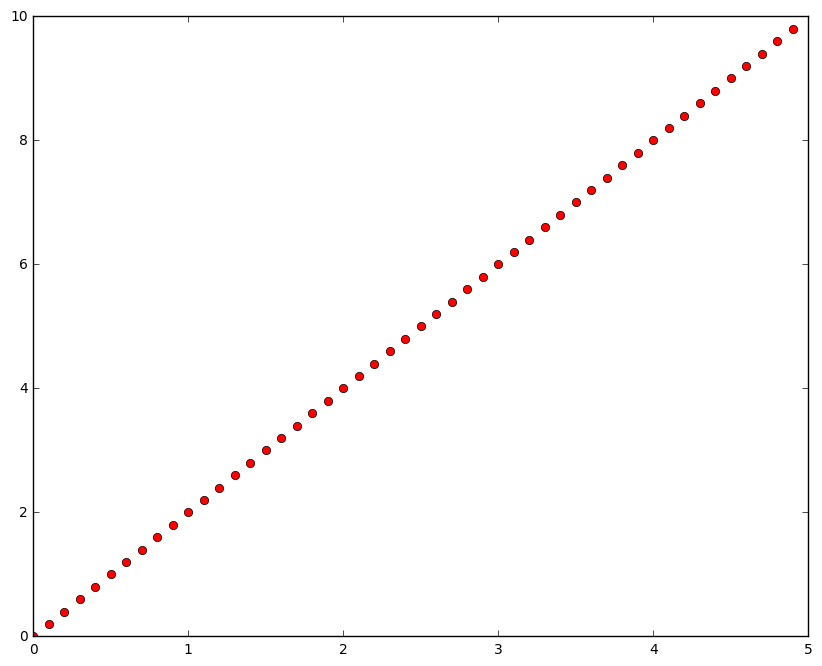

In [102]:
# generate the dataset, and plot
length = 50
random.seed(0)
X = np.array([0.1*i for i in range(length)])
y = np.array([0.2*i for i in range(length)])

# X = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
# y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
# plt.xlim(np.amin(X)-5, np.amax(X)+5)
# plt.ylim(np.amin(y)-5, np.amax(y)+5)
plt.plot(X, y, 'ro')

对回归问题进行描述，现给出以下标记：
  
  - $m$ 表示训练集中实例的数量；
  - $X$ 表示输入变量，为特征或者属性值；
  - $y$ 表示输出变量，为标签 label；
  - ( $X$, $y$ ) 表示训练集中的所有实例；
  - ( $X^{(i)}$, $y^{(i)}$ ) 表示第 $i$ 个观察实例；
  - $h$ 表示学习算法的解决方案或函数，称为假说（hypothesis）。

Why is called hypothesis?

This is a name was used in the early days of machine learning and it kind stuck. Because maybe not a great name for this sort of function, for mapping from $X$ to predictions.

实际上，我们是要将训练集“喂”给我们的学习算法，进而学得一个假设 `h`，然后当我们将要预测的 `X` 值作为输入变量，通过 `h` 就可以预测出对应的 `y` 值，称为 $\hat{y}$ 。那我们应该如何来表达这里的假设 `h` 呢？

在这里，我们是进行线性回归，可以认为 `y` 与 `X` 之间就对应着一维空间里的线性关系，即可以表示 `h` 为：

$$h_{\theta}(X^i) = \theta_{0} + \theta_{1}{X^i}$$

因为只含有一个特征属性 $X^{i}$，因此这样的问题叫做单变量的线性回归问题。

## 代价函数 (Cost Function)

对于训练集中的所有实例，我们的目的就是在使用 `h` 进行预测时，模型所得到的预测值（$\hat{y}^i$）与训练集合中的实际值（$y^i$）之间的总的误差最小，即使得代价函数 `J` 最小：

$$J(\theta_0, \theta_1) = \frac{1}{m}\sum_{i=1}^{m}\big(h_{\theta}(X^{(i)})-y^{(i)}\big)^2$$

下面我们使用三维空间中的图和等高线图来表示，一定存在一个使得 $J(\theta_0, \theta_1)$ 最小的点。

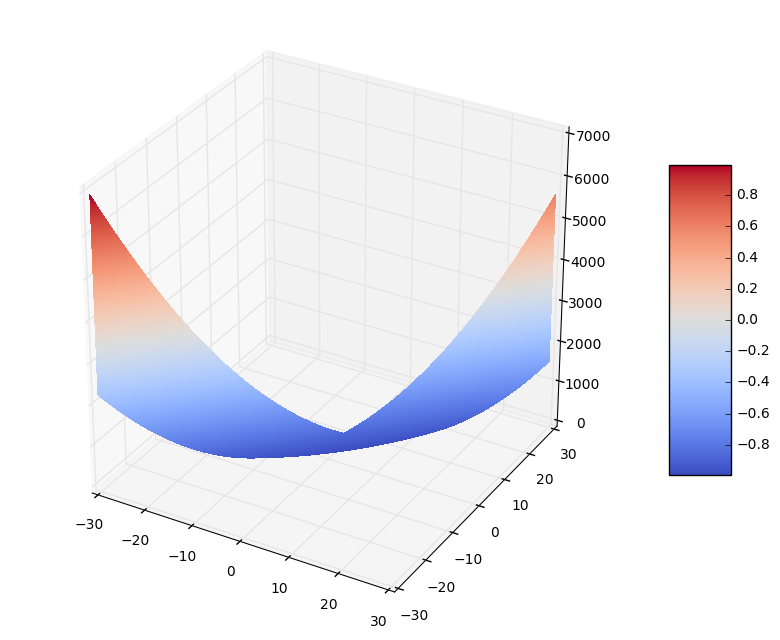

In [105]:
delta = 0.2
theta0 = np.arange(-30, 30, delta)
theta1 = np.arange(-30, 30, delta)

X_one = np.array([np.ones(length), X]).T  # X_one.shape = (11, 2)
J = np.zeros((len(theta0), len(theta1)))
for i in range(len(theta0)):
    for j in range(len(theta1)):
        theta = np.array([theta0[i], theta1[j]])
        J[i, j] = 1.0 / (2*length) * np.sum((X_one.dot(theta)-y)**2)
    
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(theta0, theta1, J, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

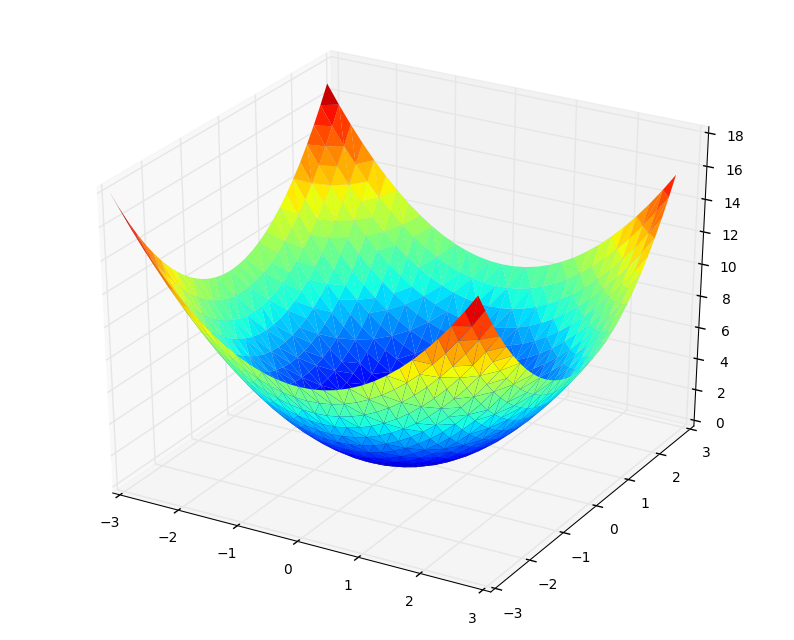

In [100]:
# 另一个例子
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

delta = 0.2
x = np.arange(-3, 3, delta)
y = np.arange(-3, 3, delta)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

x=X.flatten()
y=Y.flatten()
z=Z.flatten()

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.01)
plt.show()

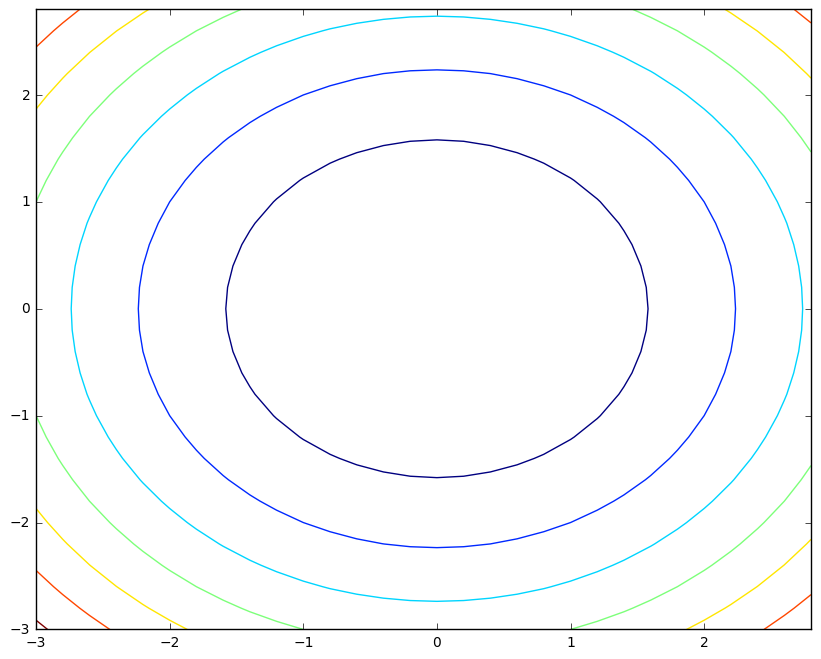

In [86]:
plt.contour(X, Y, Z) #注意这里是大写X ,Y,Z